In [1]:
import pandas as pd
import sqlite3
from pprint import pprint


In [2]:
# connect withe the chinook database 

try:
    connection = sqlite3.connect('chinook.db')

# cursor object 
   
    crsr = connection.cursor()

except sqlite3.Error as error:
    print("Error while connecting to sqlite", error)
    

tables = crsr.fetchall()  
tables

[]

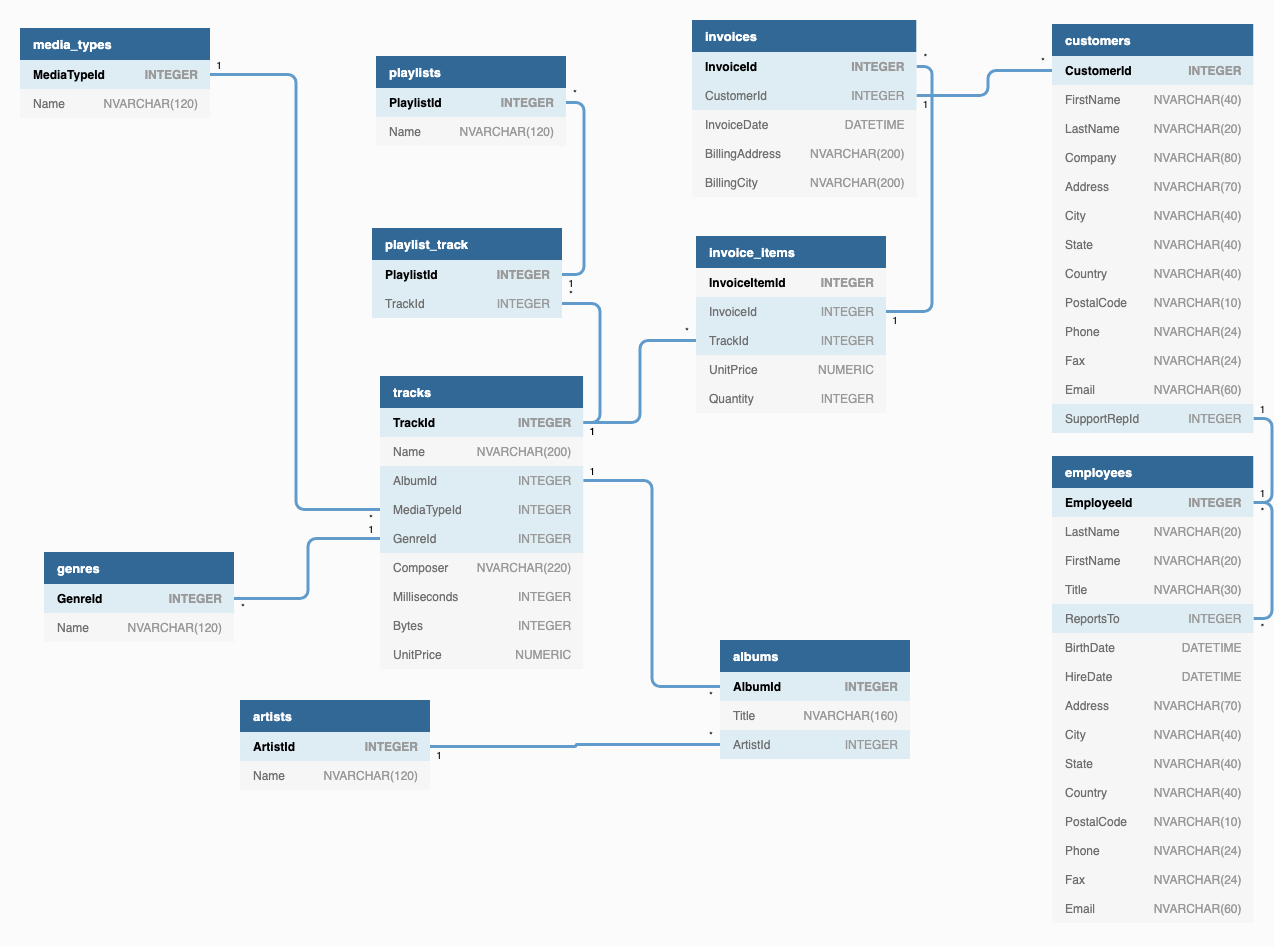

In [3]:
def sql_query(query):

    # execute the command to fetch all the data from the table emp 
    crsr.execute(query)

    # store all the fetched data in the ans variable 
    ans = crsr.fetchall()

    # get the column names in a table
    names = [description[0] for description in crsr.description]

    return pd.DataFrame(ans,columns=names)

# Query is as follows:

```
SELECT column_name, column_name
FROM table
WHERE special_criterion
```

From this query, 

To get all data in a table:

```
SELECT *
FROM table
```

It's important to note that this query works as well:

```
sElEcT *
fRoM TAble
```


# Base Query

In [10]:
#Base Queries
query = '''
SELECT * 
FROM tracks
'''

crsr.execute(query)
result = crsr.fetchall()

#pprint(result)

#print(result)

# imnprimimos los 10 primeros resultados

for row in range(10):
  print (result[row])

# sql_query(query)"""


[(1,
  'For Those About To Rock (We Salute You)',
  1,
  1,
  1,
  'Angus Young, Malcolm Young, Brian Johnson',
  343719,
  11170334,
  0.99),
 (2, 'Balls to the Wall', 2, 2, 1, None, 342562, 5510424, 0.99),
 (3,
  'Fast As a Shark',
  3,
  2,
  1,
  'F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman',
  230619,
  3990994,
  0.99),
 (4,
  'Restless and Wild',
  3,
  2,
  1,
  'F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman',
  252051,
  4331779,
  0.99),
 (5,
  'Princess of the Dawn',
  3,
  2,
  1,
  'Deaffy & R.A. Smith-Diesel',
  375418,
  6290521,
  0.99),
 (6,
  'Put The Finger On You',
  1,
  1,
  1,
  'Angus Young, Malcolm Young, Brian Johnson',
  205662,
  6713451,
  0.99),
 (7,
  "Let's Get It Up",
  1,
  1,
  1,
  'Angus Young, Malcolm Young, Brian Johnson',
  233926,
  7636561,
  0.99),
 (8,
  'Inject The Venom',
  1,
  1,
  1,
  'Angus Young, Malcolm Young, Brian Johnson',
  210834,
  6852860,
  0.99),
 (9,
  'Snowballed',
  1,
  1,
  1,
  'Angus Y

In [20]:
#Base Queries
query = '''
SELECT * 
FROM tracks
LIMIT 10;
'''

sql_query(query)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
5,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99
6,7,Let's Get It Up,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99
7,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99
8,9,Snowballed,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99
9,10,Evil Walks,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99


# Filtering

In [49]:
#Filtering
query = '''
SELECT name, composer
FROM tracks
WHERE TrackId = 222;
'''

sql_query(query)

,Name,Composer
0,Vida Boa,Fausto Nilo - Armandinho


In [36]:
#Filtering
query = '''
SELECT * 
FROM tracks
WHERE milliseconds>300000 
  AND bytes<5000000;
'''

sql_query(query)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,3350,Despertar,262,5,2,Andrea Dulbecco,307385,4821485,0.99
1,3354,I Ka Barra (Your Work),263,5,16,Habib Koité,300605,4855457,0.99
2,3401,Show Me How to Live (Live at the Quart Festival),271,2,23,None,301974,4901540,0.99


# Sorting Values

In [38]:
#Sorting Values
query = '''
SELECT * 
FROM tracks
ORDER BY name;
'''

sql_query(query)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,3027,"""40""",239,1,1,U2,157962,5251767,0.99
1,2918,"""?""",231,3,19,None,2782333,528227089,1.99
2,3412,"""Eine Kleine Nachtmusik"" Serenade In G, K. 525...",281,2,24,Wolfgang Amadeus Mozart,348971,5760129,0.99
3,109,#1 Zero,11,1,4,"Cornell, Commerford, Morello, Wilk",299102,9731988,0.99
4,3254,#9 Dream,255,2,9,None,278312,4506425,0.99
5,602,'Round Midnight,48,1,2,Miles Davis,357459,11590284,0.99
6,1833,(Anesthesia) Pulling Teeth,150,1,3,Cliff Burton,254955,8234710,0.99
7,570,(Da Le) Yaleo,46,1,1,Santana,353488,11769507,0.99
8,3045,(I Can't Help) Falling In Love With You,241,1,8,None,207568,6905623,0.99
9,3057,(Oh) Pretty Woman,242,1,1,Bill Dees/Roy Orbison,174680,5665828,0.99


In [54]:
#Sorting Values
query = '''
SELECT * 
FROM tracks
ORDER BY name DESC;
'''

sql_query(query)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1077,Último Pau-De-Arara,85,1,10,Corumbá/José Gumarães/Venancio,200437,6638563,0.99
1,1073,Óia Eu Aqui De Novo,85,1,10,None,219454,7469735,0.99
2,2078,Óculos,169,1,7,None,219271,7262419,0.99
3,3496,"Étude 1, In C Major - Preludio (Presto) - Liszt",340,4,24,None,51780,2229617,0.99
4,333,É que Nessa Encarnação Eu Nasci Manga,29,1,9,Lucina/Luli,196519,6568081,0.99
5,2461,É Uma Partida De Futebol,200,1,1,Samuel Rosa,1071,38747,0.99
6,2817,É Preciso Saber Viver,225,1,4,Erasmo Carlos/Roberto Carlos,251115,8271418,0.99
7,1963,É Fogo,161,1,16,Mônica Marianno,194873,6501520,0.99
8,857,Álibi,69,1,7,None,213237,6928434,0.99
9,379,Água de Beber,33,1,7,Antonio Carlos Jobim/Vinicius de Moraes,146677,4866476,0.99


# Unique Values

In [55]:
#Unique Values
query = '''
SELECT DISTINCT(composer)
FROM tracks;
'''

sql_query(query)

,Composer
0,"Angus Young, Malcolm Young, Brian Johnson"
1,None
2,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho..."
3,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D..."
4,Deaffy & R.A. Smith-Diesel
5,AC/DC
6,"Steven Tyler, Joe Perry, Jack Blades, Tommy Shaw"
7,"Steven Tyler, Joe Perry"
8,"Steven Tyler, Joe Perry, Jim Vallance, Holly K..."
9,"Steven Tyler, Joe Perry, Desmond Child"


# Aggregations

In [41]:
#Aggregations
query = '''
SELECT COUNT(*)
FROM tracks
WHERE name LIKE 'a%';
'''

sql_query(query)

,COUNT(*)
0,199


In [57]:
#Aggregations
query = '''
SELECT MAX(unitprice)
FROM invoice_items;
'''

sql_query(query)

,MAX(unitprice)
0,1.99


# Group By

In [47]:
#groupby

query = '''
SELECT composer, SUM(milliseconds)
FROM tracks
GROUP BY composer;
'''

sql_query(query)

,Composer,SUM(milliseconds)
0,None,695840650
1,"A. F. Iommi, W. Ward, T. Butler, J. Osbourne",705539
2,A. Jamal,276871
3,A.Bouchard/J.Bouchard/S.Pearlman,397531
4,A.Isbell/A.Jones/O.Redding,206994
5,AC/DC,2453259
6,Aaron Copland,198064
7,Aaron Goldberg,266936
8,Ace Frehley,489534
9,"Acyi Marques/Arlindo Bruz/Braço, Beto Sem/Zeca...",299102


In [48]:
#groupby

query = '''
SELECT composer, COUNT(trackid)
FROM tracks
GROUP BY composer;
'''

sql_query(query)

,Composer,COUNT(trackid)
0,None,978
1,"A. F. Iommi, W. Ward, T. Butler, J. Osbourne",3
2,A. Jamal,1
3,A.Bouchard/J.Bouchard/S.Pearlman,1
4,A.Isbell/A.Jones/O.Redding,1
5,AC/DC,8
6,Aaron Copland,1
7,Aaron Goldberg,1
8,Ace Frehley,2
9,"Acyi Marques/Arlindo Bruz/Braço, Beto Sem/Zeca...",1


# Extra Queries

In [15]:
query = '''
SELECT firstname, lastname, email
FROM customers
WHERE Email LIKE ("%@hotmail.com")
'''

sql_query(query)

,FirstName,LastName,Email
0,Kathy,Chase,kachase@hotmail.com
1,Richard,Cunningham,ricunningham@hotmail.com
2,Marc,Dubois,marc.dubois@hotmail.com
3,Emma,Jones,emma_jones@hotmail.com


In [60]:
query = '''
SELECT *
FROM employees
WHERE title = 'Sales Support Agent'
'''

sql_query(query)

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
1,4,Park,Margaret,Sales Support Agent,2,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
2,5,Johnson,Steve,Sales Support Agent,2,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


## GroupBy

As we already know how to do basic queries in SQL (and if you don’t or need a refresher, please read: “A Gentle Introduction to SQL Basics in Python”), we can start utilizing more and more tools that SQL has to offer.

The GROUP BY clause is a pretty useful tool in SQL. With it, we can drill down even further into our data and arrange identical data into groups using some functions.

If a column has the same values in different rows it would put those rows in an individual bucket.

There are three important points to using the GROUP BY clause:

    GROUP BY is used with the SELECT statement.
    In the query, GROUP BY is placed after the WHERE clause.
    In the query, GROUP BY is placed before ORDER BY (if it’s used).

Now that we have some rules in place, let’s set up the notebook!
Setting Up

We’ll be using Pokémon data from a Kaggle dataset for these examples.

While this is to put a fun spin on SQL, these examples could easily be applied to more business-like solutions, such as grouping by age groups, income levels, location, etc.

Let’s begin with importing the libraries we need and loading the CSV file in Python:

In [1]:
import pandas as pd
import sqlite3
cnx = sqlite3.connect(':memory:')

In [2]:
csvfile = ('/Users/randy/Documents/GitHub/Pokemon-Stat-Predictor/Pokemon.csv') #Original data

In [3]:
columns = ['#','name','type1','type2','total','hp','attack','defense',\
           'sp_atk','sp_def','speed','generation','legendary']
#open the csv file
df = pd.read_csv(csvfile, names=columns, header=0)

In [4]:
#find NaN values
nan_rows = df[df.isnull().T.any().T]
nan_rows.head()

,#,name,type1,type2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False


In [5]:
#change all Type 2 NaN values to 'None':
df['type2'] = df['type2'].fillna('none')

In [6]:
#check for NaN values again
nan_rows = df[df.isnull().T.any().T]
nan_rows.head()

,#,name,type1,type2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary


In [7]:
#change all strings within the dataframe to lower case
df = df.astype(str).apply(lambda x: x.str.lower())

In [8]:
df.head()

,#,name,type1,type2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
0,1,bulbasaur,grass,poison,318,45,49,49,65,65,45,1,false
1,2,ivysaur,grass,poison,405,60,62,63,80,80,60,1,false
2,3,venusaur,grass,poison,525,80,82,83,100,100,80,1,false
3,3,venusaurmega venusaur,grass,poison,625,80,100,123,122,120,80,1,false
4,4,charmander,fire,none,309,39,52,43,60,50,65,1,false


In [9]:
#set the database for pokemon
df.to_sql('pokemon', con=cnx, if_exists='append', index=False)

In [10]:
#function for the SQL queries below
def sql_query(query):
    return pd.read_sql(query, cnx)

# Some Group By examples

In [26]:
#simple MAX
query = '''
SELECT name, type1, type2, MAX(total)
FROM pokemon
WHERE legendary = 'true';
'''

sql_query(query)

,name,type1,type2,MAX(total)
0,mewtwomega mewtwo x,psychic,fighting,780


In [27]:
#MAX GROUP BY type1
query = '''
SELECT name, type1, type2, MAX(total)
FROM pokemon
WHERE legendary = 'true'
GROUP BY type1;
'''

sql_query(query)

,name,type1,type2,MAX(total)
0,yveltal,dark,flying,680
1,rayquazamega rayquaza,dragon,flying,780
2,zapdos,electric,flying,580
3,xerneas,fairy,none,680
4,ho-oh,fire,flying,680
5,tornadusincarnate forme,flying,none,580
6,giratinaaltered forme,ghost,dragon,680
7,shayminland forme,grass,none,600
8,groudonprimal groudon,ground,fire,770
9,articuno,ice,flying,580


# HAVING Clause

In [45]:
#total HP group by type1, SUM(HP) > 4000

query = '''
SELECT COUNT(name) as pokemon_count, type1, MIN(total), MAX(total), AVG(HP)
FROM pokemon
GROUP BY type1
HAVING SUM(HP) > 4000;
'''

sql_query(query)

,pokemon_count,type1,MIN(total),MAX(total),AVG(HP)
0,70,grass,180,630,67.271429
1,98,normal,190,720,77.275510
2,57,psychic,198,780,70.631579
3,112,water,200,770,72.062500


# Additional Notes/Code

# Subqueries in the SELECT, FROM, WHERE statements

In [13]:
query = '''
SELECT type1, COUNT(total), SUM(total), MIN(total), MAX(total)
FROM pokemon
WHERE total > 100
GROUP BY type1;
'''

sql_query(query)

,type1,COUNT(total),SUM(total),MIN(total),MAX(total)
0,bug,69,26146,194,600
1,dark,31,13818,220,680
2,dragon,32,17617,300,780
3,electric,44,19510,205,610
4,fairy,17,7024,218,680
5,fighting,27,11244,210,625
6,fire,52,23820,250,680
7,flying,4,1940,245,580
8,ghost,32,14066,275,680
9,grass,70,29480,180,630


# SQL | JOIN

There are a lot of things to learn in SQL, especially for me. One of the things that took the longest time for me to understand are JOIN statements. It’s intimidating at first, but after reading and lots of practice I got the hang of it and I hope by the end of this blog you’ll feel the same way!

There are four different types of Joins that we will be going over in this blog:

    INNER JOIN (or JOIN)
    LEFT JOIN (or LEFT OUTER JOIN)
    RIGHT JOIN (or RIGHT OUTER JOIN)
    FULL JOIN

Special Note: Not all SQL programs you encounter will have RIGHT JOINs or FULL JOINs, so I’ll add the workarounds to each in their respective sections.
Setting Up

For these examples, we’ll use the good ol’ Chinook database which is also used in the SQL Basics blog as well as a most other SQL related blogs I have.

Let’s set up the database file, libraries, and functions:

In [1]:
import pandas as pd
import sqlite3

<img src="chinook.png">

In [2]:
# connect withe the chinook database 
connection = sqlite3.connect("chinook.db")

# cursor object 
crsr = connection.cursor()

In [3]:
def sql_query(query):

    # execute the command to fetch all the data from the table emp 
    crsr.execute(query)

    # store all the fetched data in the ans variable 
    ans = crsr.fetchall()

    # get the column names in a table
    names = [description[0] for description in crsr.description]

    return pd.DataFrame(ans,columns=names)

# Four types of Joins:

- INNER JOIN
- LEFT JOIN
- RIGHT JOIN
- FULL JOIN

# INNER JOIN
The INNER JOIN keyword selects all rows from both tables as long as the conditions are met. This keyword creates a new set that combines all rows from both of the tables where the values of the common fields are the same.

<img src="inner_join.png">

Let’s use an example and see how this works:

In [81]:
#INNER JOIN
query = '''
SELECT a.name, a.composer, b.name
FROM tracks AS a
INNER JOIN genres AS b
ON a.genreid = b.genreid
WHERE b.name LIKE "b%"
LIMIT 10;
'''

sql_query(query)

,Name,Composer,Name
0,First Time I Met The Blues,Eurreal Montgomery,Blues
1,Let Me Love You Baby,Willie Dixon,Blues
2,Stone Crazy,Buddy Guy,Blues
3,Pretty Baby,Willie Dixon,Blues
4,When My Left Eye Jumps,Al Perkins/Willie Dixon,Blues
5,Leave My Girl Alone,Buddy Guy,Blues
6,She Suits Me To A Tee,Buddy Guy,Blues
7,Keep It To Myself (Aka Keep It To Yourself),Sonny Boy Williamson [I],Blues
8,My Time After Awhile,Robert Geddins/Ron Badger/Sheldon Feinberg,Blues
9,Too Many Ways (Alternate),Willie Dixon,Blues


# LEFT JOIN/ LEFT OUTER JOIN

<img src="left_join.png">

The LEFT JOIN keyword returns all the rows of the table on the left side of the join and matching rows for the table on the right side of the join. If there are left side rows with no matching rows on the right side, a null value will fill the space for the right side.

In [64]:
#LEFT JOIN
query = '''
SELECT a.trackid, a.name, a.composer, b.invoicelineid, b.invoiceid
FROM tracks AS a
LEFT JOIN invoice_items AS b
ON a.trackid = b.trackid;
'''

sql_query(query)

,TrackId,Name,Composer,InvoiceLineId,InvoiceId
0,1,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",579.0,108.0
1,2,Balls to the Wall,None,1.0,1.0
2,2,Balls to the Wall,None,1154.0,214.0
3,3,Fast As a Shark,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",1728.0,319.0
4,4,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",2.0,1.0
5,5,Princess of the Dawn,Deaffy & R.A. Smith-Diesel,580.0,108.0
6,6,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",3.0,2.0
7,7,Let's Get It Up,"Angus Young, Malcolm Young, Brian Johnson",NaN,NaN
8,8,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",4.0,2.0
9,8,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",1155.0,214.0


In the above example, the query sets the tracks table to the variable name a and the invoice_items table to the variable name b. It links them through the common key, trackid, and returns the trackid, name, and composer from the tracks table with the invoice line ID and invoice ID from the invoice_items table.

While looking at the data, you might think to yourself: “Where‘d the nulls go?”. And, if you didn’t, we’re going to show how to find some of them anyway!




In [66]:
#LEFT JOIN
query = '''
SELECT a.trackid, a.name, a.composer, b.invoicelineid, b.invoiceid
FROM tracks AS a
LEFT JOIN invoice_items AS b
ON a.trackid = b.trackid
WHERE b.invoiceid IS NULL;
'''

sql_query(query)

,TrackId,Name,Composer,InvoiceLineId,InvoiceId
0,7,Let's Get It Up,"Angus Young, Malcolm Young, Brian Johnson",None,None
1,11,C.O.D.,"Angus Young, Malcolm Young, Brian Johnson",None,None
2,17,Let There Be Rock,AC/DC,None,None
3,18,Bad Boy Boogie,AC/DC,None,None
4,22,Whole Lotta Rosie,AC/DC,None,None
5,23,Walk On Water,"Steven Tyler, Joe Perry, Jack Blades, Tommy Shaw",None,None
6,27,Dude (Looks Like A Lady),"Steven Tyler, Joe Perry, Desmond Child",None,None
7,29,Cryin',"Steven Tyler, Joe Perry, Taylor Rhodes",None,None
8,33,The Other Side,"Steven Tyler, Jim Vallance",None,None
9,34,Crazy,"Steven Tyler, Joe Perry, Desmond Child",None,None


The IS NULL clause is useful for finding any null values in a column. Adding this line to the original example, we find that many rows did not have a value in the original invoice_items table and are replaced with null values instead.

# RIGHT JOIN/ RIGHT OUTER JOIN

<img src="right_join.png">

Just like you’d expect, the RIGHT JOIN is similar to the LEFT JOIN. This join returns all of the rows of the table on the right side of the join and matching rows for the table on the left side of the join. And, for any rows where there are now matching rows on the left side, those values are replaced with null.

In most queries, RIGHT JOIN would look like this:

*SELECT a.trackid, a.name, a.composer, b.invoicelineid, b.invoiceid <br>
FROM tracks AS a<br>
RIGHT JOIN invoice_items AS b<br>
ON a.trackid = b.trackid;*

In [44]:
# #RIGHT JOIN
# #RIGHT JOIN isn't supported in sqlite, so we use a LEFT JOIN as a workaround

# query = '''
# SELECT a.trackid, a.name, a.composer, b.invoicelineid, b.invoiceid
# FROM tracks AS a
# RIGHT JOIN invoice_items AS b
# ON a.trackid = b.trackid;
# '''

# sql_query(query)

In [68]:
#RIGHT JOIN
#RIGHT JOIN isn't supported in sqlite, so we use a LEFT JOIN as a workaround

query = '''
SELECT b.trackid, b.name, b.composer, a.invoicelineid, a.invoiceid
FROM invoice_items AS a
LEFT JOIN tracks AS b
ON a.trackid = b.trackid;
'''

sql_query(query)

,TrackId,Name,Composer,InvoiceLineId,InvoiceId
0,2,Balls to the Wall,None,1,1
1,4,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",2,1
2,6,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",3,2
3,8,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",4,2
4,10,Evil Walks,"Angus Young, Malcolm Young, Brian Johnson",5,2
5,12,Breaking The Rules,"Angus Young, Malcolm Young, Brian Johnson",6,2
6,16,Dog Eat Dog,AC/DC,7,3
7,20,Overdose,AC/DC,8,3
8,24,Love In An Elevator,"Steven Tyler, Joe Perry",9,3
9,28,Janie's Got A Gun,"Steven Tyler, Tom Hamilton",10,3


# FULL JOIN

<img src="full_join.png">

The FULL JOIN keyword creates the result by combining the result of both a LEFT JOIN and a RIGHT JOIN. For any rows that aren’t matching, the result will contain null values.

This keyword is rarely used, but can be used to find duplicates, missing rows, or similar rows between two tables.

If your SQL program supports it, your query would look very simple:

*SELECT table1.column1,table1.column2,table2.column1,....<br>
FROM table1<br> 
FULL JOIN table2<br>
ON table1.matching_column = table2.matching_column;<br>*


In [ ]:
# #FULL JOIN
# #FULL JOIN isn't supported in sqlite, 
# #so we use a LEFT JOIN + RIGHT JOIN(inverse LEFT JOIN) as a workaround

# query = '''
# SELECT Customers.CustomerName, Orders.OrderID
# FROM Customers
# FULL OUTER JOIN Orders ON Customers.CustomerID=Orders.CustomerID;
# '''

# sql_query(query)

In [79]:
#FULL JOIN
#FULL JOIN isn't supported in sqlite, 
#so we use a LEFT JOIN + RIGHT JOIN(inverse LEFT JOIN) as a workaround

query = '''
SELECT * 
FROM invoice_items AS a
LEFT JOIN tracks AS b
ON a.trackid = b.trackid
UNION
SELECT *
FROM tracks AS a
LEFT JOIN invoice_items AS b
ON a.trackid =b.trackid
WHERE a.trackid IS NULL;
'''

sql_query(query)

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,1,2,0.99,1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
1,2,1,4,0.99,1,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
2,3,2,6,0.99,1,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99
3,4,2,8,0.99,1,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99
4,5,2,10,0.99,1,10,Evil Walks,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99
5,6,2,12,0.99,1,12,Breaking The Rules,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263288,8596840,0.99
6,7,3,16,0.99,1,16,Dog Eat Dog,4,1,1,AC/DC,215196,7032162,0.99
7,8,3,20,0.99,1,20,Overdose,4,1,1,AC/DC,369319,12066294,0.99
8,9,3,24,0.99,1,24,Love In An Elevator,5,1,1,"Steven Tyler, Joe Perry",321828,10552051,0.99
9,10,3,28,0.99,1,28,Janie's Got A Gun,5,1,1,"Steven Tyler, Tom Hamilton",330736,10869391,0.99


In this example there are three major things going on:

    The first LEFT JOIN
    The second LEFT JOIN (pseudo-RIGHT JOIN)
    The UNION that merges the two together

The IS NULL line makes sure duplicate rows don’t get entered into the result set and is very useful to have readable results.

The result will output 2240 rows of data, combining invoice data with individual song data.